In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/linear_regression_data.csv')

In [3]:
df.head(2)

,X,y
0,0.00000,13.528105
1,0.10101,11.052840


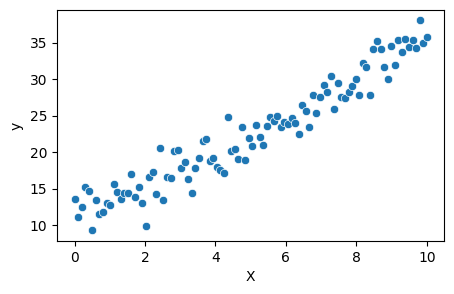

In [7]:
plt.figure(figsize=(5,3))
sns.scatterplot(data=df,x="X",y = "y")
plt.show()

In [8]:
df.shape

(100, 2)

In [14]:
X = df[["X"]]

In [15]:
y = df["y"]

In [16]:
df.isnull().sum()

,0
X,0
y,0


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pre = lr.predict(X_test)

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_test,y_pre)

0.8684277277408694

In [22]:
print(lr.coef_)
print(lr.intercept_)

[2.5763866]
9.492928128189666


# STOCHASTIC GD

In [76]:
class SGDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])

                # Use .iloc to access rows by integer position
                y_hat = np.dot(X_train.iloc[idx],self.coef_) + self.intercept_

                intercept_der = -2 * (y_train.iloc[idx] - y_hat) # Use .iloc here as well
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train.iloc[idx] - y_hat),X_train.iloc[idx]) # Use .iloc here as well
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [97]:
sgd = SGDRegressor(learning_rate=0.01,epochs=50)

In [98]:
sgd.fit(X_train,y_train)

9.669643133276134 [2.56305966]


In [99]:
y_pred = sgd.predict(X_test)
r2_score(y_test,y_pred)

0.8770091986555022

# BATCH GD

In [35]:
class GDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [136]:
gdr = GDRegressor(epochs=900,learning_rate=0.02)

In [137]:
gdr.fit(X_train,y_train)

9.489031263838903 [2.5769675]


In [138]:
y_pred = gdr.predict(X_test)
r2_score(y_test,y_pred)

0.8682345007736646

# MINI BATCH GD

In [139]:
import random

class MBGDRegressor:

    def __init__(self,batch_size,learning_rate=0.01,epochs=100):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self,X_train,y_train):
    # init your coefs
      self.intercept_ = 0
      self.coef_ = np.ones(X_train.shape[1])

      for i in range(self.epochs):

          for j in range(int(X_train.shape[0]/self.batch_size)):

              idx = random.sample(range(X_train.shape[0]),self.batch_size)

            # Use .iloc to access rows by integer position
              y_hat = np.dot(X_train.iloc[idx],self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)

            # Use .iloc to access rows in y_train as well
              intercept_der = -2 * np.mean(y_train.iloc[idx] - y_hat)
              self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            # Use .iloc to access rows in X_train as well
              coef_der = -2 * np.dot((y_train.iloc[idx] - y_hat),X_train.iloc[idx])
              self.coef_ = self.coef_ - (self.lr * coef_der)

      print(self.intercept_,self.coef_)

    def predict(self,X_test):
      return np.dot(X_test,self.coef_) + self.intercept_

In [143]:
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=50)

In [144]:
mbr.fit(X_train,y_train)

9.654231349472358 [2.46245785]


In [145]:
y_pred = mbr.predict(X_test)
r2_score(y_test,y_pred)

0.8706870552564192

# SCIKIT LEARN GRADIENT DESCENT

In [72]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=75,learning_rate='constant',eta0=0.01)
reg.fit(X_train,y_train)

SGDRegressor(learning_rate='constant', max_iter=75)

In [73]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.8521261405500815

In [61]:
print(reg.coef_)
print(reg.intercept_)

[2.8151988]
[9.33906991]
